In [1]:
%matplotlib inline


# Find ECG artifacts

Locate QRS component of ECG.


In [2]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#
# License: BSD (3-clause)


import numpy as np
import matplotlib.pyplot as plt

import mne
from mne import io
from mne.datasets import sample

print(__doc__)

data_path = sample.data_path()

Automatically created module for IPython interactive environment


Set parameters



In [4]:
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'

# Setup for reading the raw data
raw = io.read_raw_fif(raw_fname)

event_id = 999
ecg_events, _, _ = mne.preprocessing.find_ecg_events(raw, event_id,
                                                     ch_name='MEG 1531')

# Read epochs
picks = mne.pick_types(raw.info, meg=False, eeg=False, stim=False, eog=False,
                       include=['MEG 1531'], exclude='bads')
tmin, tmax = -0.1, 0.1
raw.del_proj()
epochs = mne.Epochs(raw, ecg_events, event_id, tmin, tmax, picks=picks)
data = epochs.get_data()

print("Number of detected ECG artifacts : %d" % len(data))

Opening raw data file /Users/jose/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Using channel MEG 1531 to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Number of ECG events detected : 284 (average pulse 61 / min.)
284 matching events found
Applying baseline correction (mode: mean)
Not sett

Plot ECG artifacts



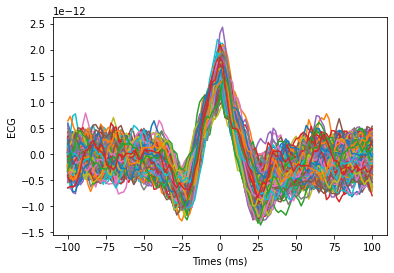

In [5]:
plt.plot(1e3 * epochs.times, np.squeeze(data).T)
plt.xlabel('Times (ms)')
plt.ylabel('ECG')
plt.show()